# Shading

In this notebook, we use [Pyrender](https://pyrender.readthedocs.io/en/latest/) package to demonstrate the effect of shading in image rendering. In order to use this notebook you need to install the package with ``pip install pyrender`` on a GPU-enabled computer.

In [1]:
import trimesh
import pyrender
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
plt.rcParams["figure.facecolor"]=(1,1,1,1)
os.environ['PYOPENGL_PLATFORM'] = 'egl'

First, we create a ground plane.

In [3]:
P=np.eye(4)
P[2,3]=-0.05
box = trimesh.creation.box((20,20,0.1),P)
box_mesh = pyrender.Mesh.from_trimesh(box)

And then we create 5 spheres of different colors and locations on the ground plane.

In [4]:
sphere = trimesh.creation.uv_sphere(radius=1.0)
sphere.visual.vertex_colors = [1.0, 0.0, 0.0]
P=np.eye(4)
P[0:3,3]=np.array([[-0.5,-2,1]])
sphere1_mesh = pyrender.Mesh.from_trimesh(sphere, poses=P)
sphere.visual.vertex_colors = [0.0, 1.0, 0.0]
P[0:3,3]=np.array([[1.5,0,1]])
sphere2_mesh = pyrender.Mesh.from_trimesh(sphere, poses=P)
sphere.visual.vertex_colors = [0.0, 0.0, 1.0]
P[0:3,3]=np.array([[-2,2,1]])
sphere3_mesh = pyrender.Mesh.from_trimesh(sphere, poses=P)
sphere.visual.vertex_colors = [0.0, 1.0, 1.0]
P[0:3,3]=np.array([[2,4,1]])
sphere4_mesh = pyrender.Mesh.from_trimesh(sphere, poses=P)
sphere.visual.vertex_colors = [1.0, 1.0, 0.0]
P[0:3,3]=np.array([[0,6,1]])
sphere5_mesh = pyrender.Mesh.from_trimesh(sphere, poses=P)

Next, a scene is created and the meshes are added.

In [5]:
scene = pyrender.Scene(ambient_light=[0.0, 0.0, 0.0],
...                        bg_color=[0.0, 0.0, 0.0])

In [6]:
bm=scene.add(box_mesh)
sm1=scene.add(sphere1_mesh)
sm2=scene.add(sphere2_mesh)
sm3=scene.add(sphere3_mesh)
sm4=scene.add(sphere4_mesh)
sm5=scene.add(sphere5_mesh)

We define a virtual camera with the field of view of 60$^{\circ}$.

In [7]:
camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0)

The camera points towards the origin of the world coordinate system so that the distance is 5.5 and the elevation angle 35$^\circ$.

In [8]:
t=55/180*np.pi
s=np.sin(t)
c=np.cos(t)

In [9]:
T=np.array([[1.0,0.0,0.0,0.0],
            [0.0,c,s,0.0],
            [0.0,-s,c,-5.5],
            [0.0,0.0,0.0,1.0]])
camera_pose=np.linalg.inv(T)

In [10]:
cam=scene.add(camera, pose=camera_pose)

We also add a simple light source above the environment.

In [11]:
light = pyrender.DirectionalLight(color=np.ones(3), intensity=2.0)
light_pose=np.eye(4)
light_pose[2,3]=5.0
lp=scene.add(light, pose=light_pose)

We render a 400 $\times$ 400 color image of the scene. As a side produce we also get a depth map.

In [12]:
r = pyrender.OffscreenRenderer(400, 400)

In [13]:
color, depth = r.render(scene)

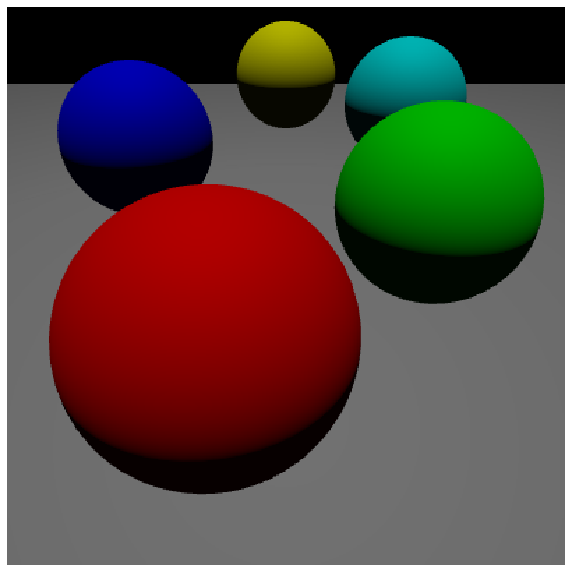

In [14]:
plt.figure(figsize=(10,15))
plt.imshow(color)
plt.axis('off');

The lower parts of the spheres remain dark. Next, we add an ambient light source that casts light equally to all parts of the scene.

In [15]:
scene.ambient_light=np.array([0.2,0.2,0.2])

In [16]:
color, depth = r.render(scene)

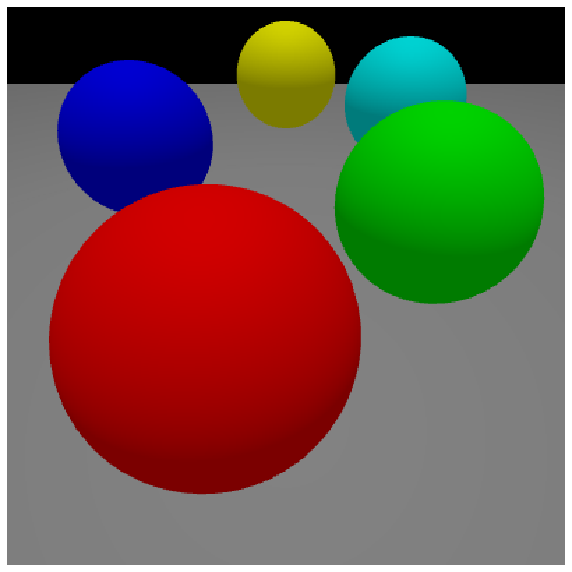

In [17]:
plt.figure(figsize=(10,15))
plt.imshow(color)
plt.axis('off');

Finally, we replace the simple light source with another more realistic point light source where the intensity attenuates with distance. We also move the light source to the same position as the camera.

In [18]:
scene.remove_node(lp)
scene.ambient_light=np.array([0.0,0.0,0.0])

In [19]:
light = pyrender.PointLight(color=np.ones(3), intensity=30.0)

In [20]:
lp=scene.add(light, pose=camera_pose)

In [21]:
color, depth = r.render(scene)

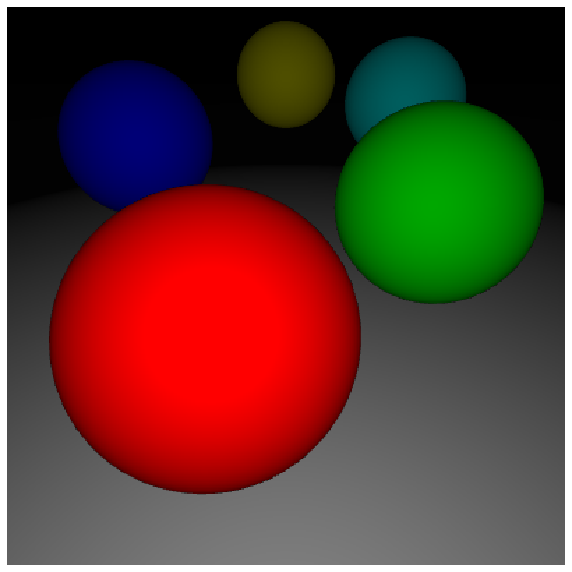

In [22]:
plt.figure(figsize=(10,15))
plt.imshow(color)
plt.axis('off');

We observe that the spheres that are closer to the light source appear brighter.